#MatPlotLib

It is the most widely used visualization library. We can simplify our lives by interpreting data in the form of charts and graphs!

MatPlotLib is a vast library and it might get confusing where to start.

This session will get you started with basics.

Let's first import the required libraries

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

Now, let's load a few datasets and use it to plot the data

In [ ]:
# Reading the meal info csv file
df_meal = pd.read_csv('meal_info.csv')

# Reading fulfilment center info csv file
df_center = pd.read_csv('fulfilment_center_info.csv')

# Reading train food csv file
df_food = pd.read_csv('train_food.csv')

In [ ]:
# Merge dataframes
df = pd.merge(df_food,df_center,on='center_id')
df = pd.merge(df,df_meal,on='meal_id')

In [ ]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0.0,0.0,177.0,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0.0,0.0,323.0,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0.0,0.0,96.0,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0.0,0.0,163.0,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0.0,0.0,215.0,647,56,TYPE_C,2.0,Beverages,Thai


##**BAR GRAPH**

Let's create a table to help us plot the graph

In [ ]:
# Pivot table
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table

,num_orders
category,
Beverages,34713032.0
Biryani,529059.0
Desert,1584446.0
Extras,3403659.0
Fish,543956.0
Other Snacks,4087714.0
Pasta,1401489.0
Pizza,6141446.0
Rice Bowl,17782784.0


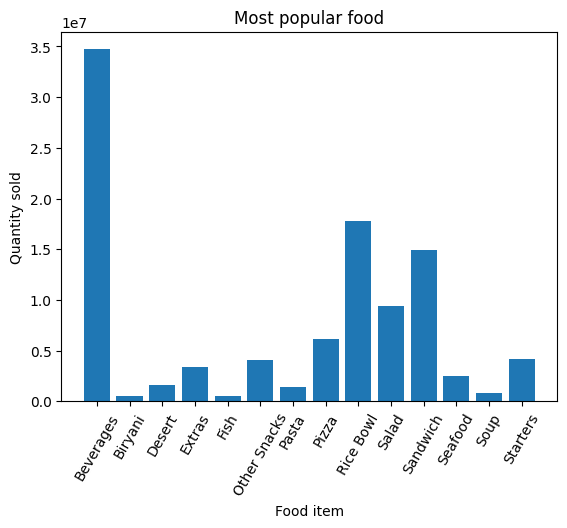

In [ ]:
# Barplot
plt.bar(table.index, table['num_orders'])
plt.xticks(rotation=60)
plt.xlabel('Food item')
plt.ylabel('Quantity sold')
plt.title('Most popular food')
plt.show()

Let's understand each of the commands one by one

`plt.bar(table.index, table['num_orders'])` : creates a bar graph with index of the table on x-axis ('Food item') and number on orders on the y-axis

`plt.xticks(rotation=60)` : rotates x-axis labels by 60 degree for better readibility

`plt.xlabel('Food item')` : sets label for the x-axis

`plt.ylabel('Quantity sold')` : sets label for the y-axis

`plt.title('Most popular food')` : sets title for the graph

`plt.show()` : displays the plot

##**PIE CHART**

In [ ]:
# dictionary for cuisine and its total orders
d_cuisine = {}

# total number of order
total = df['num_orders'].sum()

# find ratio of orders per cuisine
for i in range(df['cuisine'].nunique()):

  # cuisine
  c = df['cuisine'].unique()[i]

  # num of orders for the cuisine
  c_order = df[df['cuisine']==c]['num_orders'].sum()
  d_cuisine[c] = c_order/total

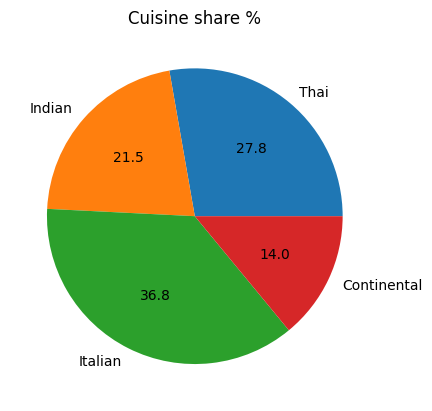

In [ ]:
#pie plot
plt.pie([x*100 for x in d_cuisine.values()], labels=[x for x in d_cuisine.keys()], autopct='%0.01f')

#label the plot
plt.title('Cuisine share %')
plt.show()

Let's discuss the arguments of `plt.pie()`

`[x*100 for x in d_cuisine.values()]` determines the sizes of the sectors

`labels=[x for x in d_cuisine.keys()]` determines the labels which are the names of cuisines

`autopct='%0.1f` prints the percentage values within pie chart upto one decimal place






##**HISTOGRAM**

Let's see how price ranges affect the number of orders

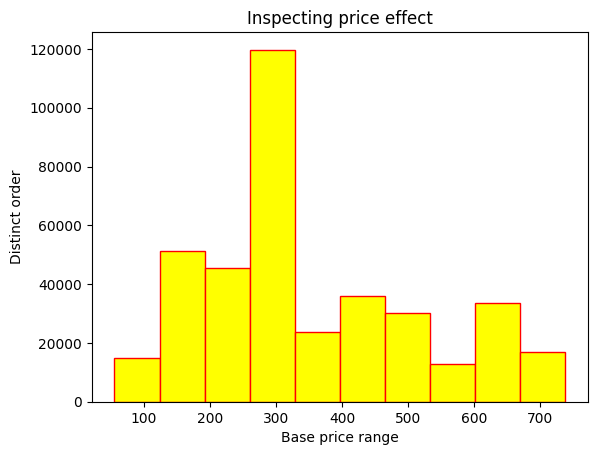

In [ ]:
# plotting histogram
plt.hist(df['base_price'], rwidth=1, alpha=1, color='yellow', bins=10, edgecolor='red')

# x and y-axis labels
plt.xlabel('Base price range')
plt.ylabel('Distinct order')

# plot title
plt.title('Inspecting price effect')

# display the plot
plt.show()

`df['base_price']` creates a histogram based on 'base price'

`rwidth=0.9` sets the relative width of bars

`alpha=0.3` sets transparency level of the bars

`color='red'` sets the colour of the bars

`edgecolor='red'` sets the edge colour of the bars

`bins=20` sets the total no. of bars

##**SCATTER PLOT**

Let's see how the operational area affects the number of orders

         num_orders
op_area            
0.9        356719.0
1.9        422538.0
2.0       1300873.0
2.4        549174.0
2.7       2603619.0


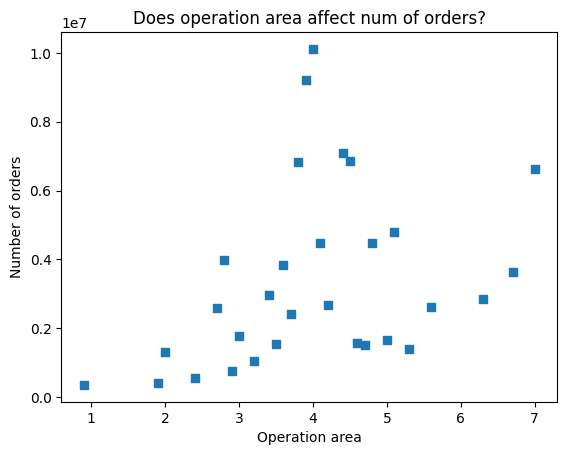

In [ ]:
#relation between op area and number of orders
op_table=pd.pivot_table(df,index='op_area', values='num_orders', aggfunc=np.sum)
print(op_table.head())

#scatter plots
plt.scatter(op_table.index, op_table['num_orders'], marker='s')

#label
plt.xlabel('Operation area')
plt.ylabel('Number of orders')
plt.title('Does operation area affect num of orders?')
plt.savefig('scatter.png')
plt.show()

##**LINE PLOT**

Let's add a new column for revenue and perform some analysis

In [ ]:
#new revenue column
df['revenue'] = df.apply(lambda x: x.checkout_price*x.num_orders,axis=1)

#new month column
df['month'] = df['week'].apply(lambda x: x//4)

#list to store month-wise revenue
month=[]
month_order=[]

for i in range(int(max(df['month']))):
    month.append(i)
    month_order.append(df[df['month']==i].revenue.sum())

#list to store week-wise revenue
week=[]
week_order=[]

for i in range(int(max(df['week']))):
    week.append(i)
    week_order.append(df[df['week']==i].revenue.sum())

`lambda x: x.checkout_price * x.num_orders` defines a lambda function that multiplies 'checkout_price' and 'num_orders' for each row x.

`apply() with axis=1` applies this lambda function along each row of the DataFrame (df), resulting in a new 'revenue' column.

 We will compare the revenue of the company in every week as well as in every month using two line-plots drawn side by side.

 For this, let's use `plt.subplots()` function.


<function matplotlib.pyplot.show(close=None, block=None)>

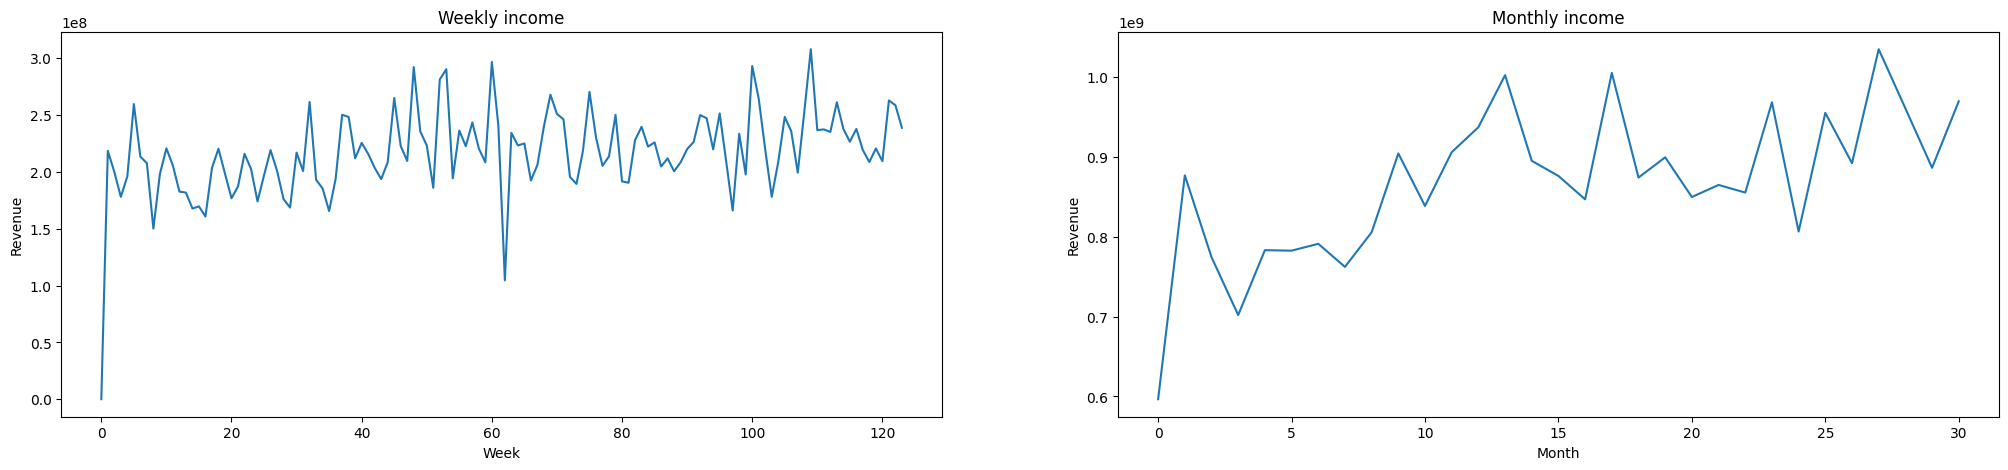

In [ ]:
#subplots returns a Figure and an Axes object
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,5))

#manipulating the first Axes
ax[0].plot(week,week_order)
ax[0].set_xlabel('Week')
ax[0].set_ylabel('Revenue')
ax[0].set_title('Weekly income')

#manipulating the second Axes
ax[1].plot(month,month_order)
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Revenue')
ax[1].set_title('Monthly income')

#display the plot
plt.show

##**Reading Images**

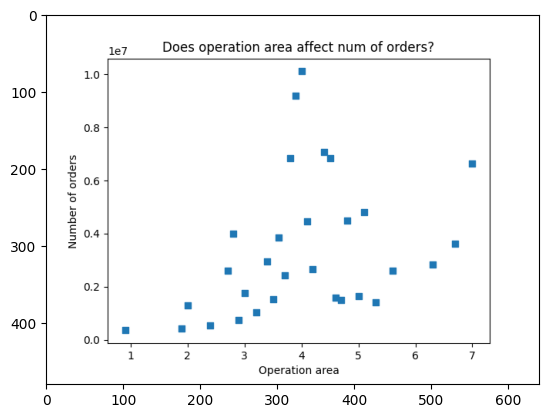

In [ ]:
import matplotlib.image as img

image = img.imread("scatter.png")  #reading the image
plt.imshow(image)                 #plotting the image

##MatPlotLib Documentation
To explore more checkout this website!\
https://matplotlib.org/stable/index.html